<h1>Dawood Sarfraz </h1>
<h1> Duplicate Questions using KNN, Decision Tree, MLP,  RandomForestClassifier and XGBoostClassifier with Advance Features </h1>

# Dataset Description
The ground truth is the set of labels that have been supplied by human experts. The ground truth labels are inherently subjective, as the true meaning of sentences can never be known with certainty. Human labeling is also a 'noisy' process, and reasonable people will disagree. As a result, the ground truth labels on this dataset should be taken to be 'informed' but not 100% accurate, and may include incorrect labeling. We believe the labels, on the whole, to represent a reasonable consensus, but this may often not be true on a case by case basis for individual items in the dataset.

<b>Please note:</b> 
All of the questions in the training set are genuine examples from Quora.

# Data fields
<b>* id - </b> the id of a training set question pair </br>
<b>* qid1, qid2 - </b>- unique ids of each question (only available in train.csv) </br>
<b>* question1, question2 - </b>- the full text of each question </br>
<b>* is_duplicate - </b> the target variable, set to 1 if question1 and question2 have essentially the same meaning, and 0 otherwise.</br>

<h1> Without Feature Engineering </h1>

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
from bs4 import BeautifulSoup

import warnings
warnings.filterwarnings('ignore')

In [11]:
df = pd.read_csv("train.csv")

In [12]:
df.shape

(404290, 6)

In [13]:
df.head(5)

id  qid1  qid2                                          question1  \
0   0     1     2  What is the step by step guide to invest in sh...   
1   1     3     4  What is the story of Kohinoor (Koh-i-Noor) Dia...   
2   2     5     6  How can I increase the speed of my internet co...   
3   3     7     8  Why am I mentally very lonely? How can I solve...   
4   4     9    10  Which one dissolve in water quikly sugar, salt...   

                                           question2  is_duplicate  
0  What is the step by step guide to invest in sh...             0  
1  What would happen if the Indian government sto...             0  
2  How can Internet speed be increased by hacking...             0  
3  Find the remainder when [math]23^{24}[/math] i...             0  
4            Which fish would survive in salt water?             0

In [14]:
df.tail(5)

id    qid1    qid2  \
404285  404285  433578  379845   
404286  404286   18840  155606   
404287  404287  537928  537929   
404288  404288  537930  537931   
404289  404289  537932  537933   

                                                question1  \
404285  How many keywords are there in the Racket prog...   
404286          Do you believe there is life after death?   
404287                                  What is one coin?   
404288  What is the approx annual cost of living while...   
404289              What is like to have sex with cousin?   

                                                question2  is_duplicate  
404285  How many keywords are there in PERL Programmin...             0  
404286         Is it true that there is life after death?             1  
404287                                  What's this coin?             0  
404288  I am having little hairfall problem but I want...             0  
404289      What is it like to have sex with your cousin?             0

In [15]:
df.sample(5)

id    qid1    qid2  \
132233  132233  211804   22372   
270019  270019  109863  197612   
106506  106506  175427  175428   
209673  209673  314021    9518   
339899  339899  111655  287598   

                                                question1  \
132233  Why PM Narendra Modi scrapped Rs 500, Rs 1000 ...   
270019  I'm interested in the stock market. Where shou...   
106506  How important for AAP is to win Punjab Assembl...   
209673                How can I get more followers in fb?   
339899  What is a good solar panel installation provid...   

                                                question2  is_duplicate  
132233  Who suggested Narendra Modi to stop the circul...             1  
270019            What are the best ways to invest money?             0  
106506                       How strong is AAP in Punjab?             0  
209673          How do I get more followers on Instagram?             0  
339899  What is a good solar panel installation provid...             0

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [17]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [18]:
df = df.dropna()

In [19]:
df.shape

(404287, 6)

In [20]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [21]:
df.duplicated().sum()

0

In [22]:
print(df["is_duplicate"].value_counts())
print((df["is_duplicate"].value_counts()/df["is_duplicate"].count())*100)

0    255024
1    149263
Name: is_duplicate, dtype: int64
0    63.079941
1    36.920059
Name: is_duplicate, dtype: float64


<Axes: >

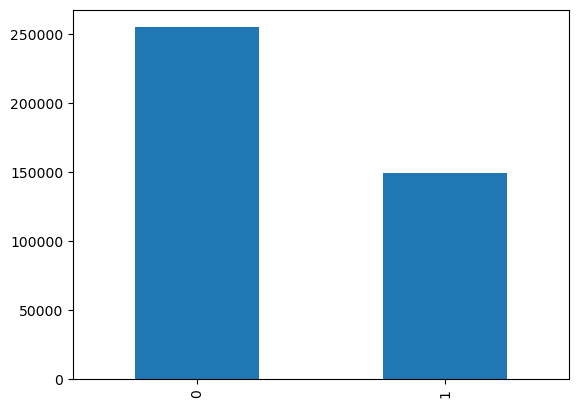

In [23]:
df["is_duplicate"].value_counts().plot(kind="bar")

<Axes: ylabel='is_duplicate'>

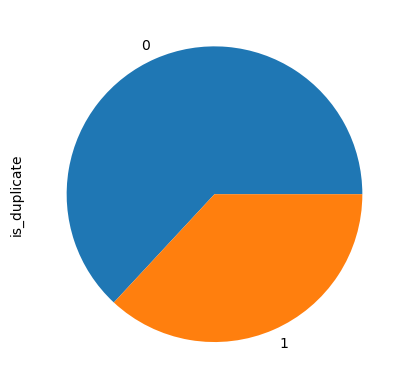

In [24]:
df["is_duplicate"].value_counts().plot(kind="pie")

In [25]:
qid = pd.Series(df["qid1"].tolist() + df["qid2"].tolist())
print("# of Unique Questions",np.unique(qid).shape[0])

# of Unique Questions 537929


In [26]:
x = qid.value_counts()>1
print("# of Questions Qepeated",x[x].shape[0])

# of Questions Qepeated 111778


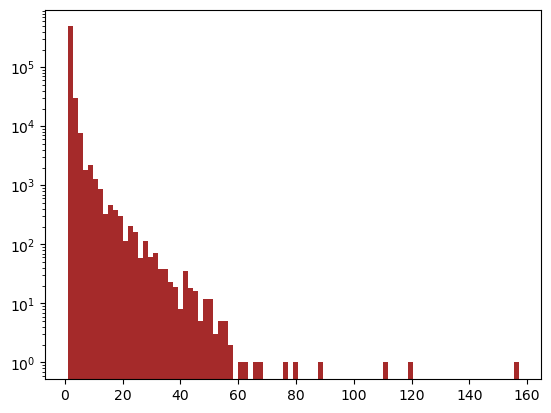

In [27]:
plt.hist(qid.value_counts().values,bins=90,color="brown")
plt.yscale("log")
plt.show()

In [28]:
new_df = df

In [29]:
new_df.shape

(404287, 6)

In [30]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [31]:
new_df = new_df.dropna()

In [32]:
new_df = df.sample(30000) 

In [33]:
new_df.shape

(30000, 6)

In [34]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [35]:
new_df.duplicated().sum()

0

In [36]:
new_df.shape

(30000, 6)

In [37]:
ques_df = new_df[['question1','question2']]
ques_df.head()

question1  \
181917                          Why does religion matter?   
280639  How do I get my "groundbreaking" app idea noti...   
364988                 What is Rob Halford’s vocal range?   
368254            How can I know my wife is not cheating?   
83348               Is Donald Trump's wife a U.S citizen?   

                                                question2  
181917                   What is a spiritual way of life?  
280639  How do I get funding for my startup idea befor...  
364988                 What is Rob Halford's vocal range?  
368254  What should I do knowing as a fact that my wif...  
83348   What does Vladimir Putin think about the possi...

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts of questions asked
questions = list(ques_df['question1']) + list(ques_df['question2'])

# if You have Good laptop increase No. of max_features
cv = CountVectorizer(max_features=3000)#creating 3000 here for Question1 7 3000 for Question2 in end would double
q1_array, q2_array = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [39]:
temp_data1 = pd.DataFrame(q1_array, index= ques_df.index) # here q1_array back to data frame
temp_data2 = pd.DataFrame(q2_array, index= ques_df.index) # here q2_array back to data frame
temp_data = pd.concat([temp_data1, temp_data2], axis=1) # concating data frames here to make sigle data frame
temp_data.shape 

(30000, 6000)

In [40]:
temp_data['is_duplicate'] = new_df['is_duplicate']

In [41]:
temp_data.shape

(30000, 6001)

In [42]:
temp_data.head(5)

0  1  2  3  4  5  6  7  8  9  ...  2991  2992  2993  2994  2995  2996  \
181917  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
280639  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
364988  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
368254  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
83348   0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   

        2997  2998  2999  is_duplicate  
181917     0     0     0             0  
280639     0     0     0             1  
364988     0     0     0             1  
368254     0     0     0             0  
83348      0     0     0             0  

[5 rows x 6001 columns]

In [43]:
temp_data.tail(5)

0  1  2  3  4  5  6  7  8  9  ...  2991  2992  2993  2994  2995  2996  \
139431  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
253042  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
276820  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
165142  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     1     0     0   
369318  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   

        2997  2998  2999  is_duplicate  
139431     0     0     0             0  
253042     0     0     0             0  
276820     0     0     0             0  
165142     0     0     0             1  
369318     0     0     0             0  

[5 rows x 6001 columns]

In [44]:
temp_data.sample(5)

0  1  2  3  4  5  6  7  8  9  ...  2991  2992  2993  2994  2995  2996  \
98683   0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
335741  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
100469  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
130737  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
390371  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   

        2997  2998  2999  is_duplicate  
98683      0     0     0             0  
335741     0     0     0             0  
100469     0     0     0             0  
130737     0     0     0             0  
390371     1     0     0             1  

[5 rows x 6001 columns]

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(temp_data.iloc[:,0:-1].values, temp_data.iloc[:,-1],
                                                    test_size=0.2,random_state= 42)

In [46]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
accuracy = accuracy_score(y_test,y_pred) * 100
print("Accuracy of Random Forest",accuracy)

Accuracy of Random Forest 73.86666666666667


In [47]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
accuracy = accuracy_score(y_test,y_pred) * 100
print("Accuracy of Random Forest",accuracy)

Accuracy of Random Forest 72.61666666666666


In [48]:
 '''from sklearn import svm

# Create an SVM classifier
svm_classifier = svm.SVC(kernel='linear')

# Train the model
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
'''

'from sklearn import svm\n\n# Create an SVM classifier\nsvm_classifier = svm.SVC(kernel=\'linear\')\n\n# Train the model\nsvm_classifier.fit(X_train, y_train)\n\n# Make predictions on the test set\ny_pred = svm_classifier.predict(X_test)\n\n# Evaluate the accuracy of the model\naccuracy = accuracy_score(y_test, y_pred)\nprint("Accuracy:", accuracy)\n'

In [49]:
from sklearn.neural_network import MLPClassifier

# Create an MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)

# Train the classifier
mlp.fit(X_train, y_train)

# Make predictions on the test set
y_pred = mlp.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy = accuracy  * 100
print("Accuracy:", accuracy )


Accuracy: 67.78333333333333


In [50]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier object
knn = KNeighborsClassifier(n_neighbors=3)

# Train the classifier
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred) * 100
print("Accuracy:", accuracy)


Accuracy: 65.96666666666667


In [51]:
from sklearn.tree import DecisionTreeClassifier

# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the testing data to model
y_pred = clf.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred) * 100
print("Accuracy:", accuracy)


Accuracy: 66.63333333333334


<h1> Advance Feature Engineering </h1>

In [52]:
df =pd.read_csv("train.csv")

In [53]:
new_df = df.sample(20000,random_state=2)

In [54]:
new_df.shape

(20000, 6)

In [55]:
new_df.head(5)

id    qid1    qid2  \
398782  398782  496695  532029   
115086  115086  187729  187730   
327711  327711  454161  454162   
367788  367788  498109  491396   
151235  151235  237843   50930   

                                                question1  \
398782  What is the best marketing automation tool for...   
115086  I am poor but I want to invest. What should I do?   
327711  I am from India and live abroad. I met a guy f...   
367788  Why do so many people in the U.S. hate the sou...   
151235                Consequences of Bhopal gas tragedy?   

                                                question2  is_duplicate  
398782  What is the best marketing automation tool for...             1  
115086  I am quite poor and I want to be very rich. Wh...             0  
327711  T.I.E.T to Thapar University to Thapar Univers...             0  
367788  My boyfriend doesnt feel guilty when he hurts ...             0  
151235  What was the reason behind the Bhopal gas trag...             0

In [56]:
new_df.tail(5)

id    qid1    qid2  \
36225    36225   66076   66077   
333984  333984  461132  461133   
289725  289725  410890  410891   
342679  342679  470689  470690   
245585  245585  358455  358456   

                                                question1  \
36225   Can I find out who is sending my public snap s...   
333984                What do you mean by business world?   
289725  How we can use waste plastics bags and bottles...   
342679  Are hackathons a good place to find technical ...   
245585    Is it safe to visit srinagar in September 2016?   

                                                question2  is_duplicate  
36225   Is Apple still an innovative, strong competito...             0  
333984                            What is business world?             1  
289725  How we can use waste plastic bags and bottles ...             1  
342679  I have no background in programming but have a...             0  
245585  Is it safe to visit Srinagar in this coming Se...             1

In [57]:
def questions_preprocessing(question):
    
    question = str(question).lower().strip()

    # Decontracting words
    contractions = { 
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have",
    "'ve": " have",
    "n't": " not",
    "'re": " are",
    "'ll": " will"  
    }

    question_decontracted = []

    for word in question.split():
        if word in contractions:
            word = contractions[word]
            
        question_decontracted.append(word)

    question = ' '.join(question_decontracted)
    
    
    # Replace certain special characters with their string equivalents
    question = question.replace('%', ' percent')
    question = question.replace('$', ' dollar ')
    question = question.replace('₹', ' rupee ')
    question = question.replace('€', ' euro ')
    question = question.replace('@', ' at ')
    question = question.replace('R$',  'Brazilian Real')
    question = question.replace('S$',  'Singapore Dollar')
    question = question.replace('NZ$', 'New Zealand Dollar')
    question = question.replace('HK$', 'Hong Kong Dollar')
    question = question.replace('₩',   'South Korean Won')                                
    question = question.replace('₺', 'Turkish Lira')
    question = question.replace('₽',  'Russian Ruble')
    question = question.replace('zł',  'Polish Zloty')
    question = question.replace('Kč',  'Czech Koruna')
    question = question.replace('₪',   'Israeli Shekel')
    question = question.replace('¥',   'Chinese Yuan')
    question = question.replace('₣',   'Swiss Franc')
                                
        
    # The pattern '[math]' appears around 900 times in the whole dataset.
    question = question.replace('[math]', '')
    
    # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
    question = question.replace(',000,000,000 ', 'b ')
    question = question.replace(',000,000 ', 'm ')
    question = question.replace(',000 ', 'k ')
    
    # re is regualar Experssion
    question = re.sub(r'([0-9]+)000000000', r'\1b', question)
    question = re.sub(r'([0-9]+)000000', r'\1m', question)
    question = re.sub(r'([0-9]+)000', r'\1k', question)
    # Removing HTML tags
    question = BeautifulSoup(question)
    question = question.get_text()
    
    # Remove punctuations
    pattern = re.compile('\W')
    question = re.sub(pattern, ' ', question).strip()

    
    return question
    

In [58]:
questions_preprocessing("That's Great <b>done</b>?")

'that is great done'

In [59]:
new_df['question1'] = new_df['question1'].apply(questions_preprocessing)
new_df['question2'] = new_df['question2'].apply(questions_preprocessing)

In [60]:
new_df.shape

(20000, 6)

In [61]:
new_df.sample(5)

id    qid1    qid2  \
71195    71195  122562   42155   
40425    40425   73146   73147   
392669  392669  525376  525377   
300164  300164   44282  110047   
355006  355006  389915  484202   

                                                question1  \
71195   what are the options for an average student af...   
40425                    how can i write seo content fast   
392669     what does seeing the number 44 everywhere mean   
300164  what is the last thing you would like to do be...   
355006  what are the best ways to do marketing in real...   

                                                question2  is_duplicate  
71195   what is best career plan after completing grad...             0  
40425              which is a great seo content generator             1  
392669  what does it mean to see the number 44 everywhere             1  
300164  what is the one thing that you want to do befo...             1  
355006               how do i analyze real estate markets             0

In [62]:
new_df.head(5)

id    qid1    qid2  \
398782  398782  496695  532029   
115086  115086  187729  187730   
327711  327711  454161  454162   
367788  367788  498109  491396   
151235  151235  237843   50930   

                                                question1  \
398782  what is the best marketing automation tool for...   
115086   i am poor but i want to invest  what should i do   
327711  i am from india and live abroad  i met a guy f...   
367788  why do so many people in the u s  hate the sou...   
151235                 consequences of bhopal gas tragedy   

                                                question2  is_duplicate  
398782  what is the best marketing automation tool for...             1  
115086  i am quite poor and i want to be very rich  wh...             0  
327711  t i e t to thapar university to thapar univers...             0  
367788  my boyfriend doesnt feel guilty when he hurts ...             0  
151235  what was the reason behind the bhopal gas tragedy             0

In [63]:
new_df.tail(5)

id    qid1    qid2  \
36225    36225   66076   66077   
333984  333984  461132  461133   
289725  289725  410890  410891   
342679  342679  470689  470690   
245585  245585  358455  358456   

                                                question1  \
36225   can i find out who is sending my public snap s...   
333984                 what do you mean by business world   
289725  how we can use waste plastics bags and bottles...   
342679  are hackathons a good place to find technical ...   
245585     is it safe to visit srinagar in september 2016   

                                                question2  is_duplicate  
36225   is apple still an innovative  strong competito...             0  
333984                             what is business world             1  
289725  how we can use waste plastic bags and bottles ...             1  
342679  i have no background in programming but have a...             0  
245585  is it safe to visit srinagar in this coming se...             1

In [64]:
new_df['chars_in_q1'] = new_df['question1'].str.len() 
new_df['chars_in_q2'] = new_df['question2'].str.len()

In [65]:
new_df.shape

(20000, 8)

In [66]:
new_df.sample(5)

id    qid1    qid2  \
97089    97089  161610  161611   
232060  232060  342009  342010   
389542  389542  522031    1772   
216063  216063  322109  322110   
229706  229706  339079  339080   

                                                question1  \
97089                            why do people feel pride   
232060  can a person suffered by sickle cell disease b...   
389542                  how can i increase my height fast   
216063  how do i describe a manifold such as a cylinde...   
229706                           how did alan rickman die   

                                                question2  is_duplicate  \
97089                            why do people feel shame             0   
232060  can a person with myopia disease be a ias officer             0   
389542                   how can you increase your height             0   
216063        what is flat manifold and non flat manifold             0   
229706      what alan rickman movie did you like the most             0   

        chars_in_q1  chars_in_q2  
97089            24           24  
232060           92           49  
389542           33           32  
216063           78           43  
229706           24           45

In [67]:
new_df.head(5)

id    qid1    qid2  \
398782  398782  496695  532029   
115086  115086  187729  187730   
327711  327711  454161  454162   
367788  367788  498109  491396   
151235  151235  237843   50930   

                                                question1  \
398782  what is the best marketing automation tool for...   
115086   i am poor but i want to invest  what should i do   
327711  i am from india and live abroad  i met a guy f...   
367788  why do so many people in the u s  hate the sou...   
151235                 consequences of bhopal gas tragedy   

                                                question2  is_duplicate  \
398782  what is the best marketing automation tool for...             1   
115086  i am quite poor and i want to be very rich  wh...             0   
327711  t i e t to thapar university to thapar univers...             0   
367788  my boyfriend doesnt feel guilty when he hurts ...             0   
151235  what was the reason behind the bhopal gas tragedy             0   

        chars_in_q1  chars_in_q2  
398782           75           76  
115086           48           56  
327711          104          119  
367788           58          145  
151235           34           49

In [68]:
new_df.tail(5)

id    qid1    qid2  \
36225    36225   66076   66077   
333984  333984  461132  461133   
289725  289725  410890  410891   
342679  342679  470689  470690   
245585  245585  358455  358456   

                                                question1  \
36225   can i find out who is sending my public snap s...   
333984                 what do you mean by business world   
289725  how we can use waste plastics bags and bottles...   
342679  are hackathons a good place to find technical ...   
245585     is it safe to visit srinagar in september 2016   

                                                question2  is_duplicate  \
36225   is apple still an innovative  strong competito...             0   
333984                             what is business world             1   
289725  how we can use waste plastic bags and bottles ...             1   
342679  i have no background in programming but have a...             0   
245585  is it safe to visit srinagar in this coming se...             1   

        chars_in_q1  chars_in_q2  
36225           137          112  
333984           34           22  
289725           62           65  
342679          143          140  
245585           46           53

In [69]:
new_df['words_no_words_in_q1'] = new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['words_no_words_in_q2'] = new_df['question2'].apply(lambda row: len(row.split(" ")))


In [70]:
new_df.shape

(20000, 10)

In [71]:
new_df.head(5)

id    qid1    qid2  \
398782  398782  496695  532029   
115086  115086  187729  187730   
327711  327711  454161  454162   
367788  367788  498109  491396   
151235  151235  237843   50930   

                                                question1  \
398782  what is the best marketing automation tool for...   
115086   i am poor but i want to invest  what should i do   
327711  i am from india and live abroad  i met a guy f...   
367788  why do so many people in the u s  hate the sou...   
151235                 consequences of bhopal gas tragedy   

                                                question2  is_duplicate  \
398782  what is the best marketing automation tool for...             1   
115086  i am quite poor and i want to be very rich  wh...             0   
327711  t i e t to thapar university to thapar univers...             0   
367788  my boyfriend doesnt feel guilty when he hurts ...             0   
151235  what was the reason behind the bhopal gas tragedy             0   

        chars_in_q1  chars_in_q2  words_no_words_in_q1  words_no_words_in_q2  
398782           75           76                    13                    13  
115086           48           56                    13                    16  
327711          104          119                    28                    21  
367788           58          145                    14                    32  
151235           34           49                     5                     9

In [72]:
new_df.tail(5)

id    qid1    qid2  \
36225    36225   66076   66077   
333984  333984  461132  461133   
289725  289725  410890  410891   
342679  342679  470689  470690   
245585  245585  358455  358456   

                                                question1  \
36225   can i find out who is sending my public snap s...   
333984                 what do you mean by business world   
289725  how we can use waste plastics bags and bottles...   
342679  are hackathons a good place to find technical ...   
245585     is it safe to visit srinagar in september 2016   

                                                question2  is_duplicate  \
36225   is apple still an innovative  strong competito...             0   
333984                             what is business world             1   
289725  how we can use waste plastic bags and bottles ...             1   
342679  i have no background in programming but have a...             0   
245585  is it safe to visit srinagar in this coming se...             1   

        chars_in_q1  chars_in_q2  words_no_words_in_q1  words_no_words_in_q2  
36225           137          112                    28                    20  
333984           34           22                     7                     4  
289725           62           65                    11                    12  
342679          143          140                    23                    28  
245585           46           53                     9                    10

In [73]:
new_df.tail(5)

id    qid1    qid2  \
36225    36225   66076   66077   
333984  333984  461132  461133   
289725  289725  410890  410891   
342679  342679  470689  470690   
245585  245585  358455  358456   

                                                question1  \
36225   can i find out who is sending my public snap s...   
333984                 what do you mean by business world   
289725  how we can use waste plastics bags and bottles...   
342679  are hackathons a good place to find technical ...   
245585     is it safe to visit srinagar in september 2016   

                                                question2  is_duplicate  \
36225   is apple still an innovative  strong competito...             0   
333984                             what is business world             1   
289725  how we can use waste plastic bags and bottles ...             1   
342679  i have no background in programming but have a...             0   
245585  is it safe to visit srinagar in this coming se...             1   

        chars_in_q1  chars_in_q2  words_no_words_in_q1  words_no_words_in_q2  
36225           137          112                    28                    20  
333984           34           22                     7                     4  
289725           62           65                    11                    12  
342679          143          140                    23                    28  
245585           46           53                     9                    10

In [74]:
def common_words_in_questions(row):
    word1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    word2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    length = len(word1 & word2)
    return length

In [75]:
new_df['common_words_qs'] = new_df.apply(common_words_in_questions, axis=1)

In [76]:
new_df.shape

(20000, 11)

In [77]:
new_df.head(5)

id    qid1    qid2  \
398782  398782  496695  532029   
115086  115086  187729  187730   
327711  327711  454161  454162   
367788  367788  498109  491396   
151235  151235  237843   50930   

                                                question1  \
398782  what is the best marketing automation tool for...   
115086   i am poor but i want to invest  what should i do   
327711  i am from india and live abroad  i met a guy f...   
367788  why do so many people in the u s  hate the sou...   
151235                 consequences of bhopal gas tragedy   

                                                question2  is_duplicate  \
398782  what is the best marketing automation tool for...             1   
115086  i am quite poor and i want to be very rich  wh...             0   
327711  t i e t to thapar university to thapar univers...             0   
367788  my boyfriend doesnt feel guilty when he hurts ...             0   
151235  what was the reason behind the bhopal gas tragedy             0   

        chars_in_q1  chars_in_q2  words_no_words_in_q1  words_no_words_in_q2  \
398782           75           76                    13                    13   
115086           48           56                    13                    16   
327711          104          119                    28                    21   
367788           58          145                    14                    32   
151235           34           49                     5                     9   

        common_words_qs  
398782               12  
115086                8  
327711                4  
367788                1  
151235                3

In [78]:
new_df.sample(5)

id    qid1    qid2  \
29814    29814   55122   55123   
136098  136098   54919  157084   
170592  170592  263739  138872   
339989  339989  143283  467685   
162692  162692  253229  253230   

                                                question1  \
29814   what was the age of rama and sita when they go...   
136098      what is the best book about digital marketing   
170592         what field of engineering pays the highest   
339989  what function does the nose has in the respira...   
162692  will missing mothers surname in certificates c...   

                                                question2  is_duplicate  \
29814   i am a muslim female and i want to marry a hin...             0   
136098      which are the best books on digital marketing             1   
170592  which field of engineering gives the highest s...             1   
339989  what is the function of the respiratory system...             0   
162692   age barrier for commercial pilot training in usa             0   

        chars_in_q1  chars_in_q2  words_no_words_in_q1  words_no_words_in_q2  \
29814            55           94                    12                    24   
136098           45           45                     8                     8   
170592           42           51                     7                     8   
339989           57           60                    10                    11   
162692          111           48                    19                     8   

        common_words_qs  
29814                 2  
136098                4  
170592                5  
339989                5  
162692                1

In [79]:
new_df.tail(5)

id    qid1    qid2  \
36225    36225   66076   66077   
333984  333984  461132  461133   
289725  289725  410890  410891   
342679  342679  470689  470690   
245585  245585  358455  358456   

                                                question1  \
36225   can i find out who is sending my public snap s...   
333984                 what do you mean by business world   
289725  how we can use waste plastics bags and bottles...   
342679  are hackathons a good place to find technical ...   
245585     is it safe to visit srinagar in september 2016   

                                                question2  is_duplicate  \
36225   is apple still an innovative  strong competito...             0   
333984                             what is business world             1   
289725  how we can use waste plastic bags and bottles ...             1   
342679  i have no background in programming but have a...             0   
245585  is it safe to visit srinagar in this coming se...             1   

        chars_in_q1  chars_in_q2  words_no_words_in_q1  words_no_words_in_q2  \
36225           137          112                    28                    20   
333984           34           22                     7                     4   
289725           62           65                    11                    12   
342679          143          140                    23                    28   
245585           46           53                     9                    10   

        common_words_qs  
36225                 3  
333984                3  
289725               10  
342679                6  
245585                8

In [80]:
def total_words_in_questions(row):
    word1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    word2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    length = (len(word1) + len(word2))
    return length

In [81]:
new_df['total_words_in_questions'] = new_df.apply(total_words_in_questions, axis=1)

In [82]:
new_df.shape

(20000, 12)

In [83]:
new_df.sample(5)

id    qid1    qid2  \
186976  186976  203765  285078   
248076  248076  184449  121560   
237037  237037  102177  206436   
112282  112282   22524  183742   
355893  355893  244584   55038   

                                                question1  \
186976  what are the novels you can suggest that are w...   
248076                                  do you like anime   
237037                    how bad is it to swallow bleach   
112282                        what is the spirit of quora   
355893       what are the best ways to get rid of boredom   

                                          question2  is_duplicate  \
186976  can you suggest me some good novels to read             1   
248076                      why do you hate animals             0   
237037             what happens if you drink bleach             1   
112282                           what is the spirit             0   
355893                how do you get out of boredom             1   

        chars_in_q1  chars_in_q2  words_no_words_in_q1  words_no_words_in_q2  \
186976           58           43                    11                     9   
248076           17           23                     4                     5   
237037           31           32                     7                     6   
112282           27           18                     6                     4   
355893           44           29                    10                     7   

        common_words_qs  total_words_in_questions  
186976                4                        19  
248076                2                         9  
237037                1                        13  
112282                4                        10  
355893                3                        17

In [84]:
new_df.head(5)

id    qid1    qid2  \
398782  398782  496695  532029   
115086  115086  187729  187730   
327711  327711  454161  454162   
367788  367788  498109  491396   
151235  151235  237843   50930   

                                                question1  \
398782  what is the best marketing automation tool for...   
115086   i am poor but i want to invest  what should i do   
327711  i am from india and live abroad  i met a guy f...   
367788  why do so many people in the u s  hate the sou...   
151235                 consequences of bhopal gas tragedy   

                                                question2  is_duplicate  \
398782  what is the best marketing automation tool for...             1   
115086  i am quite poor and i want to be very rich  wh...             0   
327711  t i e t to thapar university to thapar univers...             0   
367788  my boyfriend doesnt feel guilty when he hurts ...             0   
151235  what was the reason behind the bhopal gas tragedy             0   

        chars_in_q1  chars_in_q2  words_no_words_in_q1  words_no_words_in_q2  \
398782           75           76                    13                    13   
115086           48           56                    13                    16   
327711          104          119                    28                    21   
367788           58          145                    14                    32   
151235           34           49                     5                     9   

        common_words_qs  total_words_in_questions  
398782               12                        26  
115086                8                        24  
327711                4                        38  
367788                1                        34  
151235                3                        13

In [85]:
new_df.tail(5)

id    qid1    qid2  \
36225    36225   66076   66077   
333984  333984  461132  461133   
289725  289725  410890  410891   
342679  342679  470689  470690   
245585  245585  358455  358456   

                                                question1  \
36225   can i find out who is sending my public snap s...   
333984                 what do you mean by business world   
289725  how we can use waste plastics bags and bottles...   
342679  are hackathons a good place to find technical ...   
245585     is it safe to visit srinagar in september 2016   

                                                question2  is_duplicate  \
36225   is apple still an innovative  strong competito...             0   
333984                             what is business world             1   
289725  how we can use waste plastic bags and bottles ...             1   
342679  i have no background in programming but have a...             0   
245585  is it safe to visit srinagar in this coming se...             1   

        chars_in_q1  chars_in_q2  words_no_words_in_q1  words_no_words_in_q2  \
36225           137          112                    28                    20   
333984           34           22                     7                     4   
289725           62           65                    11                    12   
342679          143          140                    23                    28   
245585           46           53                     9                    10   

        common_words_qs  total_words_in_questions  
36225                 3                        42  
333984                3                        11  
289725               10                        23  
342679                6                        46  
245585                8                        19

In [86]:
new_df['shared_words_in_questions'] = round(new_df['common_words_qs']/new_df['total_words_in_questions'],2)


In [87]:
new_df.shape

(20000, 13)

In [88]:
new_df.head(5)

id    qid1    qid2  \
398782  398782  496695  532029   
115086  115086  187729  187730   
327711  327711  454161  454162   
367788  367788  498109  491396   
151235  151235  237843   50930   

                                                question1  \
398782  what is the best marketing automation tool for...   
115086   i am poor but i want to invest  what should i do   
327711  i am from india and live abroad  i met a guy f...   
367788  why do so many people in the u s  hate the sou...   
151235                 consequences of bhopal gas tragedy   

                                                question2  is_duplicate  \
398782  what is the best marketing automation tool for...             1   
115086  i am quite poor and i want to be very rich  wh...             0   
327711  t i e t to thapar university to thapar univers...             0   
367788  my boyfriend doesnt feel guilty when he hurts ...             0   
151235  what was the reason behind the bhopal gas tragedy             0   

        chars_in_q1  chars_in_q2  words_no_words_in_q1  words_no_words_in_q2  \
398782           75           76                    13                    13   
115086           48           56                    13                    16   
327711          104          119                    28                    21   
367788           58          145                    14                    32   
151235           34           49                     5                     9   

        common_words_qs  total_words_in_questions  shared_words_in_questions  
398782               12                        26                       0.46  
115086                8                        24                       0.33  
327711                4                        38                       0.11  
367788                1                        34                       0.03  
151235                3                        13                       0.23

In [89]:
new_df.tail(5)

id    qid1    qid2  \
36225    36225   66076   66077   
333984  333984  461132  461133   
289725  289725  410890  410891   
342679  342679  470689  470690   
245585  245585  358455  358456   

                                                question1  \
36225   can i find out who is sending my public snap s...   
333984                 what do you mean by business world   
289725  how we can use waste plastics bags and bottles...   
342679  are hackathons a good place to find technical ...   
245585     is it safe to visit srinagar in september 2016   

                                                question2  is_duplicate  \
36225   is apple still an innovative  strong competito...             0   
333984                             what is business world             1   
289725  how we can use waste plastic bags and bottles ...             1   
342679  i have no background in programming but have a...             0   
245585  is it safe to visit srinagar in this coming se...             1   

        chars_in_q1  chars_in_q2  words_no_words_in_q1  words_no_words_in_q2  \
36225           137          112                    28                    20   
333984           34           22                     7                     4   
289725           62           65                    11                    12   
342679          143          140                    23                    28   
245585           46           53                     9                    10   

        common_words_qs  total_words_in_questions  shared_words_in_questions  
36225                 3                        42                       0.07  
333984                3                        11                       0.27  
289725               10                        23                       0.43  
342679                6                        46                       0.13  
245585                8                        19                       0.42

In [90]:
new_df.sample(5)

id    qid1    qid2  \
257584  257584  372932  372933   
150742  150742  237175  237176   
319307  319307  444725  444726   
306972  306972  430590  430591   
315387  315387  440275  440276   

                                                question1  \
257584  can you tell me about myself just by reading t...   
150742  is mississippi or alabama the most racist stat...   
319307  what is a sensible methodology benchmark to pr...   
306972  what are some examples of chess players collud...   
315387  why do most people only think of karma as futu...   

                                                question2  is_duplicate  \
257584  can you tell me something about myself just by...             0   
150742  why is mississippi the most backward state  bo...             0   
319307  what is a sensible methodology benchmark to pr...             1   
306972  if jamaica had been a white colony with a mino...             0   
315387  what are some of deep learning models that can...             0   

        chars_in_q1  chars_in_q2  words_no_words_in_q1  words_no_words_in_q2  \
257584           58           68                    11                    12   
150742           57           76                    11                    12   
319307          135          143                    24                    26   
306972           89          114                    15                    23   
315387          145          110                    26                    18   

        common_words_qs  total_words_in_questions  shared_words_in_questions  
257584               11                        23                       0.48  
150742                5                        22                       0.23  
319307               19                        41                       0.46  
306972                1                        36                       0.03  
315387                2                        38                       0.05

In [91]:
# Advanced Feature adding
from nltk.corpus import stopwords

def token_features_fetching_from_questions(row):
    
    question1 = row['question1']
    question2 = row['question2']
    
    SAFE_DIV = 0.0000001 

    STOP_WORDS = stopwords.words("english")
    
    token_features = [0.0]*8 # bcz of 8 features 0-7
    
    # Converting the Sentence into Tokens: 
    question1_tokens = question1.split()
    question2_tokens = question2.split()
    
    if len(question1_tokens) == 0 or len(question2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    question1_words = set([word for word in question1_tokens if word not in STOP_WORDS])
    question2_words = set([word for word in question2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    question1_stops = set([word for word in question1_tokens if word in STOP_WORDS])
    question2_stops = set([word for word in question2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(question1_words.intersection(question2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(question1_stops.intersection(question2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(question1_tokens).intersection(set(question2_tokens)))
    
    token_features[0] = common_word_count / (min(len(question1_words), len(question2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(question1_words), len(question2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(question1_stops), len(question2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(question1_stops), len(question2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(question1_tokens), len(question2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(question1_tokens), len(question2_tokens)) + SAFE_DIV)
    
    # Last word of Q1 AND Q2 is SAME or NOT
    token_features[6] = int(question1_tokens[-1] == question2_tokens[-1])
    
    # First word of Q1 AND Q2 is AME or NOT
    token_features[7] = int(question1_tokens[0] == question2_tokens[0])
    
    return token_features


In [92]:
token_features = new_df.apply(token_features_fetching_from_questions, axis=1)

new_df["common_words_count_min"]       = list(map(lambda x: x[0], token_features))
new_df["common_words_count_max"]       = list(map(lambda x: x[1], token_features))
new_df["common_stopwords_count_min"]       = list(map(lambda x: x[2], token_features))
new_df["common_stopwords_count_max"]       = list(map(lambda x: x[3], token_features))
new_df["common_token_count_min"]       = list(map(lambda x: x[4], token_features))
new_df["common_token_count_max"]       = list(map(lambda x: x[5], token_features))
new_df["last_word_matching"]  = list(map(lambda x: x[6], token_features))
new_df["first_word_matching"] = list(map(lambda x: x[7], token_features))

In [93]:
new_df.shape

(20000, 21)

In [94]:
new_df.sample(5)

id    qid1    qid2  \
198950  198950  300282  300283   
382301  382301  514140  514141   
393546  393546  526360  526361   
135772  135772  216763  216764   
2294      2294    4561    4562   

                                                question1  \
198950         how can i log in to textplus on a computer   
382301  why did sandor clegane leave command in the ba...   
393546  what are three essential characteristics of go...   
135772        is oh no  ok go album  available on spotify   
2294                 what does honors means in graduation   

                                                question2  is_duplicate  \
198950   why does my computer keep logging off on its own             0   
382301  would stannis baratheon have won the battle of...             0   
393546  what are the characteristics of a good communi...             1   
135772            is radiohead s new album on spotify yet             0   
2294    i have trouble getting my claim amount form ap...             0   

        chars_in_q1  chars_in_q2  words_no_words_in_q1  words_no_words_in_q2  \
198950           42           48                    10                    10   
382301           68          109                    12                    19   
393546           62           52                     8                     8   
135772           43           39                    11                     8   
2294             36           64                     6                    11   

        ...  total_words_in_questions  shared_words_in_questions  \
198950  ...                        20                       0.10   
382301  ...                        30                       0.13   
393546  ...                        16                       0.38   
135772  ...                        18                       0.22   
2294    ...                        17                       0.00   

        common_words_count_min  common_words_count_max  \
198950                0.333333                0.333333   
382301                0.285714                0.285714   
393546                1.000000                0.600000   
135772                0.400000                0.333333   
2294                  0.000000                0.000000   

        common_stopwords_count_min  common_stopwords_count_max  \
198950                    0.142857                    0.142857   
382301                    0.400000                    0.181818   
393546                    1.000000                    0.600000   
135772                    0.666667                    0.666667   
2294                      0.000000                    0.000000   

        common_token_count_min  common_token_count_max  last_word_matching  \
198950                0.200000                0.200000                   0   
382301                0.333333                0.210526                   0   
393546                0.750000                0.750000                   1   
135772                0.500000                0.444444                   0   
2294                  0.000000                0.000000                   0   

        first_word_matching  
198950                    0  
382301                    0  
393546                    1  
135772                    1  
2294                      0  

[5 rows x 21 columns]

In [95]:
new_df.head(5)

id    qid1    qid2  \
398782  398782  496695  532029   
115086  115086  187729  187730   
327711  327711  454161  454162   
367788  367788  498109  491396   
151235  151235  237843   50930   

                                                question1  \
398782  what is the best marketing automation tool for...   
115086   i am poor but i want to invest  what should i do   
327711  i am from india and live abroad  i met a guy f...   
367788  why do so many people in the u s  hate the sou...   
151235                 consequences of bhopal gas tragedy   

                                                question2  is_duplicate  \
398782  what is the best marketing automation tool for...             1   
115086  i am quite poor and i want to be very rich  wh...             0   
327711  t i e t to thapar university to thapar univers...             0   
367788  my boyfriend doesnt feel guilty when he hurts ...             0   
151235  what was the reason behind the bhopal gas tragedy             0   

        chars_in_q1  chars_in_q2  words_no_words_in_q1  words_no_words_in_q2  \
398782           75           76                    13                    13   
115086           48           56                    13                    16   
327711          104          119                    28                    21   
367788           58          145                    14                    32   
151235           34           49                     5                     9   

        ...  total_words_in_questions  shared_words_in_questions  \
398782  ...                        26                       0.46   
115086  ...                        24                       0.33   
327711  ...                        38                       0.11   
367788  ...                        34                       0.03   
151235  ...                        13                       0.23   

        common_words_count_min  common_words_count_max  \
398782                0.875000                   0.875   
115086                0.666667                   0.500   
327711                0.000000                   0.000   
367788                0.000000                   0.000   
151235                0.750000                   0.600   

        common_stopwords_count_min  common_stopwords_count_max  \
398782                    1.000000                    1.000000   
115086                    0.714286                    0.625000   
327711                    0.428571                    0.272727   
367788                    0.000000                    0.000000   
151235                    0.000000                    0.000000   

        common_token_count_min  common_token_count_max  last_word_matching  \
398782                0.923077                0.923077                   1   
115086                0.583333                0.466667                   1   
327711                0.150000                0.115385                   0   
367788                0.000000                0.000000                   0   
151235                0.600000                0.333333                   1   

        first_word_matching  
398782                    1  
115086                    1  
327711                    0  
367788                    0  
151235                    0  

[5 rows x 21 columns]

In [96]:
new_df.tail(5)

id    qid1    qid2  \
36225    36225   66076   66077   
333984  333984  461132  461133   
289725  289725  410890  410891   
342679  342679  470689  470690   
245585  245585  358455  358456   

                                                question1  \
36225   can i find out who is sending my public snap s...   
333984                 what do you mean by business world   
289725  how we can use waste plastics bags and bottles...   
342679  are hackathons a good place to find technical ...   
245585     is it safe to visit srinagar in september 2016   

                                                question2  is_duplicate  \
36225   is apple still an innovative  strong competito...             0   
333984                             what is business world             1   
289725  how we can use waste plastic bags and bottles ...             1   
342679  i have no background in programming but have a...             0   
245585  is it safe to visit srinagar in this coming se...             1   

        chars_in_q1  chars_in_q2  words_no_words_in_q1  words_no_words_in_q2  \
36225           137          112                    28                    20   
333984           34           22                     7                     4   
289725           62           65                    11                    12   
342679          143          140                    23                    28   
245585           46           53                     9                    10   

        ...  total_words_in_questions  shared_words_in_questions  \
36225   ...                        42                       0.07   
333984  ...                        11                       0.27   
289725  ...                        23                       0.43   
342679  ...                        46                       0.13   
245585  ...                        19                       0.42   

        common_words_count_min  common_words_count_max  \
36225                 0.000000                0.000000   
333984                1.000000                0.666667   
289725                0.833333                0.833333   
342679                0.166667                0.133333   
245585                0.800000                0.800000   

        common_stopwords_count_min  common_stopwords_count_max  \
36225                     0.285714                    0.181818   
333984                    0.500000                    0.250000   
289725                    1.000000                    0.833333   
342679                    0.500000                    0.272727   
245585                    1.000000                    0.800000   

        common_token_count_min  common_token_count_max  last_word_matching  \
36225                 0.105263                0.074074                   0   
333984                0.750000                0.428571                   1   
289725                0.909091                0.833333                   1   
342679                0.238095                0.185185                   0   
245585                0.888889                0.800000                   0   

        first_word_matching  
36225                     0  
333984                    1  
289725                    1  
342679                    0  
245585                    1  

[5 rows x 21 columns]

In [97]:
import distance

def fetch_length_features(row):
    
    question1 = row['question1']
    question2 = row['question2']
    
    length_features = [0.0]*3
    
    # Converting the Sentence into Tokens: 
    question1_tokens = question1.split()
    question2_tokens = question2.split()
    
    if len(question1_tokens) == 0 or len(question2_tokens) == 0:
        return length_features
    
    
    #Average Token Length of both Questions
    length_features[0] = (len(question1_tokens) + len(question2_tokens))/2
    
    # Absolute length features
    length_features[1] = abs(len(question1_tokens) - len(question2_tokens))
    
    strs = list(distance.lcsubstrings(question1, question2))
    length_features[2] = len(strs[0]) / (min(len(question1), len(question2)) + 1)
    
    return length_features
    

In [98]:
length_features = new_df.apply(fetch_length_features, axis=1)

new_df['average_length_of_question'] = list(map(lambda x: x[0], length_features))
new_df['absolute_difference_of_qs_length'] = list(map(lambda x: x[1], length_features))
new_df['longest_substring_ratio'] = list(map(lambda x: x[2], length_features))

In [99]:
new_df.shape

(20000, 24)

In [100]:
new_df.head(5)

id    qid1    qid2  \
398782  398782  496695  532029   
115086  115086  187729  187730   
327711  327711  454161  454162   
367788  367788  498109  491396   
151235  151235  237843   50930   

                                                question1  \
398782  what is the best marketing automation tool for...   
115086   i am poor but i want to invest  what should i do   
327711  i am from india and live abroad  i met a guy f...   
367788  why do so many people in the u s  hate the sou...   
151235                 consequences of bhopal gas tragedy   

                                                question2  is_duplicate  \
398782  what is the best marketing automation tool for...             1   
115086  i am quite poor and i want to be very rich  wh...             0   
327711  t i e t to thapar university to thapar univers...             0   
367788  my boyfriend doesnt feel guilty when he hurts ...             0   
151235  what was the reason behind the bhopal gas tragedy             0   

        chars_in_q1  chars_in_q2  words_no_words_in_q1  words_no_words_in_q2  \
398782           75           76                    13                    13   
115086           48           56                    13                    16   
327711          104          119                    28                    21   
367788           58          145                    14                    32   
151235           34           49                     5                     9   

        ...  common_words_count_max  common_stopwords_count_min  \
398782  ...                   0.875                    1.000000   
115086  ...                   0.500                    0.714286   
327711  ...                   0.000                    0.428571   
367788  ...                   0.000                    0.000000   
151235  ...                   0.600                    0.000000   

        common_stopwords_count_max  common_token_count_min  \
398782                    1.000000                0.923077   
115086                    0.625000                0.583333   
327711                    0.272727                0.150000   
367788                    0.000000                0.000000   
151235                    0.000000                0.600000   

        common_token_count_max  last_word_matching  first_word_matching  \
398782                0.923077                   1                    1   
115086                0.466667                   1                    1   
327711                0.115385                   0                    0   
367788                0.000000                   0                    0   
151235                0.333333                   1                    0   

        average_length_of_question  absolute_difference_of_qs_length  \
398782                        13.0                                 0   
115086                        13.5                                 3   
327711                        23.0                                 6   
367788                        21.5                                17   
151235                         7.0                                 4   

        longest_substring_ratio  
398782                 0.855263  
115086                 0.224490  
327711                 0.047619  
367788                 0.050847  
151235                 0.542857  

[5 rows x 24 columns]

In [101]:
new_df.sample(5)

id    qid1    qid2  \
103882  103882   94517  171598   
351268  351268  480097  480098   
231307  231307  341081  341082   
244302  244302  356908  356909   
41638    41638   75156   75157   

                                                question1  \
103882                       why should i become a doctor   
351268  what is the iupac name for ch3_ch_ ch_ ch3 ch3...   
231307    why was the cgi for supreme leader snoke so bad   
244302  how many calories are in a serving of bread wi...   
41638         is it ever okay to slap a child in the face   

                                                question2  is_duplicate  \
103882      what should i do if i can not become a doctor             0   
351268  what is the iupac name of ch3ch ch3  ccl c ch3...             0   
231307  why was supreme leader snoke made as a cgi cha...             0   
244302             how many calories are considered a lot             0   
41638   is it okay to hit my child if he is over eighteen             0   

        chars_in_q1  chars_in_q2  words_no_words_in_q1  words_no_words_in_q2  \
103882           28           45                     6                    11   
351268           50           57                    11                    17   
231307           47          113                    10                    21   
244302          100           38                    20                     7   
41638            43           49                    11                    12   

        ...  common_words_count_max  common_stopwords_count_min  \
103882  ...                1.000000                        0.75   
351268  ...                0.375000                        0.75   
231307  ...                0.363636                        0.40   
244302  ...                0.285714                        1.00   
41638   ...                0.400000                        0.50   

        common_stopwords_count_max  common_token_count_min  \
103882                    0.375000                0.833333   
351268                    0.750000                0.545455   
231307                    0.250000                0.600000   
244302                    0.333333                0.714286   
41638                     0.428571                0.454545   

        common_token_count_max  last_word_matching  first_word_matching  \
103882                0.454545                   1                    0   
351268                0.428571                   0                    1   
231307                0.300000                   0                    1   
244302                0.263158                   0                    1   
41638                 0.416667                   0                    1   

        average_length_of_question  absolute_difference_of_qs_length  \
103882                         8.5                                 5   
351268                        12.5                                 3   
231307                        15.0                                10   
244302                        13.0                                12   
41638                         11.5                                 1   

        longest_substring_ratio  
103882                 0.551724  
351268                 0.450980  
231307                 0.458333  
244302                 0.564103  
41638                  0.204545  

[5 rows x 24 columns]

In [102]:
new_df.tail(5)

id    qid1    qid2  \
36225    36225   66076   66077   
333984  333984  461132  461133   
289725  289725  410890  410891   
342679  342679  470689  470690   
245585  245585  358455  358456   

                                                question1  \
36225   can i find out who is sending my public snap s...   
333984                 what do you mean by business world   
289725  how we can use waste plastics bags and bottles...   
342679  are hackathons a good place to find technical ...   
245585     is it safe to visit srinagar in september 2016   

                                                question2  is_duplicate  \
36225   is apple still an innovative  strong competito...             0   
333984                             what is business world             1   
289725  how we can use waste plastic bags and bottles ...             1   
342679  i have no background in programming but have a...             0   
245585  is it safe to visit srinagar in this coming se...             1   

        chars_in_q1  chars_in_q2  words_no_words_in_q1  words_no_words_in_q2  \
36225           137          112                    28                    20   
333984           34           22                     7                     4   
289725           62           65                    11                    12   
342679          143          140                    23                    28   
245585           46           53                     9                    10   

        ...  common_words_count_max  common_stopwords_count_min  \
36225   ...                0.000000                    0.285714   
333984  ...                0.666667                    0.500000   
289725  ...                0.833333                    1.000000   
342679  ...                0.133333                    0.500000   
245585  ...                0.800000                    1.000000   

        common_stopwords_count_max  common_token_count_min  \
36225                     0.181818                0.105263   
333984                    0.250000                0.750000   
289725                    0.833333                0.909091   
342679                    0.272727                0.238095   
245585                    0.800000                0.888889   

        common_token_count_max  last_word_matching  first_word_matching  \
36225                 0.074074                   0                    0   
333984                0.428571                   1                    1   
289725                0.833333                   1                    1   
342679                0.185185                   0                    0   
245585                0.800000                   0                    1   

        average_length_of_question  absolute_difference_of_qs_length  \
36225                         23.0                                 8   
333984                         5.5                                 3   
289725                        11.5                                 1   
342679                        24.0                                 6   
245585                         9.5                                 1   

        longest_substring_ratio  
36225                  0.035398  
333984                 0.652174  
289725                 0.444444  
342679                 0.085106  
245585                 0.680851  

[5 rows x 24 columns]

In [103]:
# Fuzzy Features
from fuzzywuzzy import fuzz

def fetch_fuzzy_features_from_questions(row):
    
    question1 = row['question1']
    question2 = row['question2']
    
    fuzzy_features = [0.0]*4
    

    # fuzz_partial_ratio btw question 1 and Question 2
    fuzzy_features[0] = fuzz.partial_ratio(question1, question2)

    # fuzz_ratio btw question 1 and Question 2
    fuzzy_features[1] = fuzz.QRatio(question1, question2)
    
    # token_sort_ratio btw question 1 and Question 2
    fuzzy_features[2] = fuzz.token_sort_ratio(question1, question2)

    # token_set_ratio btw question 1 and Question 2
    fuzzy_features[3] = fuzz.token_set_ratio(question1, question2)

    return fuzzy_features

In [104]:
fuzzy_features = new_df.apply(fetch_fuzzy_features_from_questions, axis=1)

# Creating new feature columns for fuzzy features in already given data set
new_df['fuzz_partial_ratio'] = list(map(lambda x: x[0], fuzzy_features))
new_df['fuzz_ratio'] = list(map(lambda x: x[1], fuzzy_features))
new_df['token_sort_ratio'] = list(map(lambda x: x[2], fuzzy_features))
new_df['token_set_ratio'] = list(map(lambda x: x[3], fuzzy_features))

In [108]:
new_df.shape

(20000, 28)

In [109]:
new_df.head(5)

id    qid1    qid2  \
398782  398782  496695  532029   
115086  115086  187729  187730   
327711  327711  454161  454162   
367788  367788  498109  491396   
151235  151235  237843   50930   

                                                question1  \
398782  what is the best marketing automation tool for...   
115086   i am poor but i want to invest  what should i do   
327711  i am from india and live abroad  i met a guy f...   
367788  why do so many people in the u s  hate the sou...   
151235                 consequences of bhopal gas tragedy   

                                                question2  is_duplicate  \
398782  what is the best marketing automation tool for...             1   
115086  i am quite poor and i want to be very rich  wh...             0   
327711  t i e t to thapar university to thapar univers...             0   
367788  my boyfriend doesnt feel guilty when he hurts ...             0   
151235  what was the reason behind the bhopal gas tragedy             0   

        chars_in_q1  chars_in_q2  words_no_words_in_q1  words_no_words_in_q2  \
398782           75           76                    13                    13   
115086           48           56                    13                    16   
327711          104          119                    28                    21   
367788           58          145                    14                    32   
151235           34           49                     5                     9   

        ...  common_token_count_max  last_word_matching  first_word_matching  \
398782  ...                0.923077                   1                    1   
115086  ...                0.466667                   1                    1   
327711  ...                0.115385                   0                    0   
367788  ...                0.000000                   0                    0   
151235  ...                0.333333                   1                    0   

        average_length_of_question  absolute_difference_of_qs_length  \
398782                        13.0                                 0   
115086                        13.5                                 3   
327711                        23.0                                 6   
367788                        21.5                                17   
151235                         7.0                                 4   

        longest_substring_ratio  fuzz_partial_ratio  fuzz_ratio  \
398782                 0.855263                  99          99   
115086                 0.224490                  67          69   
327711                 0.047619                  29          26   
367788                 0.050847                  41          29   
151235                 0.542857                  70          55   

        token_sort_ratio  token_set_ratio  
398782                99               99  
115086                65               74  
327711                34               43  
367788                23               30  
151235                48               69  

[5 rows x 28 columns]

In [110]:
new_df.sample(5)

id    qid1    qid2  \
360069  360069   63836  158795   
323593  323593  449573  449574   
161269  161269   21200  113942   
164589  164589   62406  109956   
278751  278751  175092   34326   

                                                question1  \
360069                what is the funniest movie to watch   
323593  find the equation to the circle passin through...   
161269  how do a junior high school students make mone...   
164589  what are prospects and challenges of pulses in...   
278751     what should be done to improve problem solving   

                                                question2  is_duplicate  \
360069  what is the funniest movie that you have ever ...             1   
323593                  consultancy job after engineering             0   
161269           how can a high school student make money             1   
164589  what are the prospects for pulses for sustaina...             1   
278751        how can i improve me problem solving skills             1   

        chars_in_q1  chars_in_q2  words_no_words_in_q1  words_no_words_in_q2  \
360069           35           53                     7                    10   
323593          112           33                    28                     4   
161269           62           40                    11                     8   
164589           60           63                    10                    10   
278751           46           43                     8                     8   

        ...  common_token_count_max  last_word_matching  first_word_matching  \
360069  ...                0.500000                   0                    1   
323593  ...                0.000000                   0                    0   
161269  ...                0.545455                   0                    1   
164589  ...                0.600000                   1                    1   
278751  ...                0.375000                   0                    0   

        average_length_of_question  absolute_difference_of_qs_length  \
360069                         8.5                                 3   
323593                        14.0                                20   
161269                         9.5                                 3   
164589                        10.0                                 0   
278751                         8.0                                 0   

        longest_substring_ratio  fuzz_partial_ratio  fuzz_ratio  \
360069                 0.777778                  86          80   
323593                 0.088235                  39          12   
161269                 0.487805                  80          73   
164589                 0.229508                  68          72   
278751                 0.386364                  70          63   

        token_sort_ratio  token_set_ratio  
360069                75               85  
323593                18               21  
161269                73               82  
164589                68               80  
278751                65               70  

[5 rows x 28 columns]

In [111]:
new_df.tail(5)

id    qid1    qid2  \
36225    36225   66076   66077   
333984  333984  461132  461133   
289725  289725  410890  410891   
342679  342679  470689  470690   
245585  245585  358455  358456   

                                                question1  \
36225   can i find out who is sending my public snap s...   
333984                 what do you mean by business world   
289725  how we can use waste plastics bags and bottles...   
342679  are hackathons a good place to find technical ...   
245585     is it safe to visit srinagar in september 2016   

                                                question2  is_duplicate  \
36225   is apple still an innovative  strong competito...             0   
333984                             what is business world             1   
289725  how we can use waste plastic bags and bottles ...             1   
342679  i have no background in programming but have a...             0   
245585  is it safe to visit srinagar in this coming se...             1   

        chars_in_q1  chars_in_q2  words_no_words_in_q1  words_no_words_in_q2  \
36225           137          112                    28                    20   
333984           34           22                     7                     4   
289725           62           65                    11                    12   
342679          143          140                    23                    28   
245585           46           53                     9                    10   

        ...  common_token_count_max  last_word_matching  first_word_matching  \
36225   ...                0.074074                   0                    0   
333984  ...                0.428571                   1                    1   
289725  ...                0.833333                   1                    1   
342679  ...                0.185185                   0                    0   
245585  ...                0.800000                   0                    1   

        average_length_of_question  absolute_difference_of_qs_length  \
36225                         23.0                                 8   
333984                         5.5                                 3   
289725                        11.5                                 1   
342679                        24.0                                 6   
245585                         9.5                                 1   

        longest_substring_ratio  fuzz_partial_ratio  fuzz_ratio  \
36225                  0.035398                  33          30   
333984                 0.652174                  77          71   
289725                 0.444444                  94          96   
342679                 0.085106                  21          21   
245585                 0.680851                  74          83   

        token_sort_ratio  token_set_ratio  
36225                 36               38  
333984                71               93  
289725                96               96  
342679                41               36  
245585                85               94  

[5 rows x 28 columns]

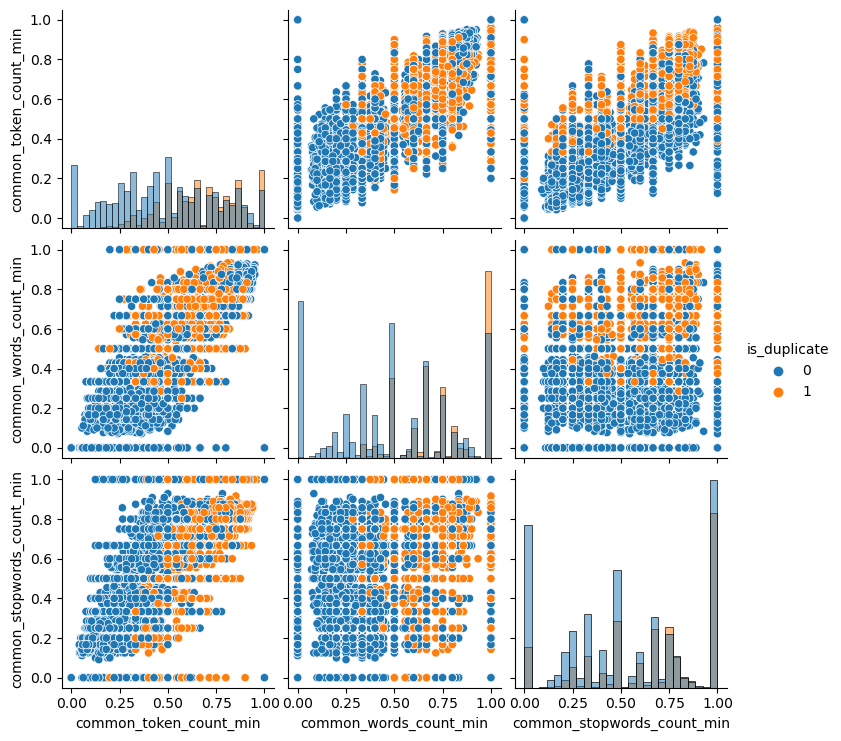

In [112]:
sns.pairplot(new_df[['common_token_count_min', 'common_words_count_min', 'common_stopwords_count_min', 'is_duplicate']], hue='is_duplicate',diag_kind="hist")

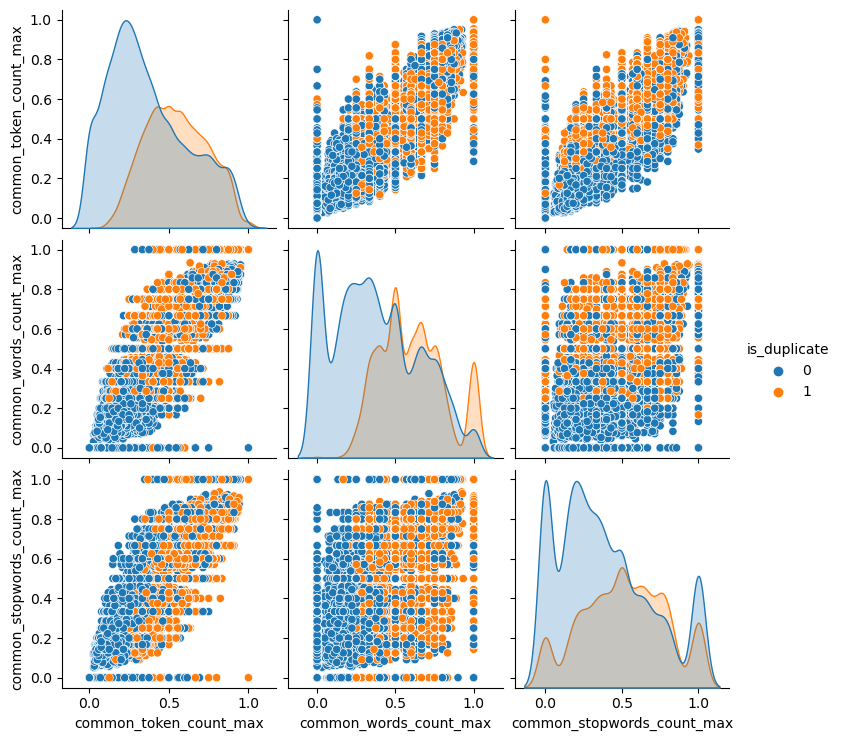

In [113]:
sns.pairplot(new_df[['common_token_count_max', 'common_words_count_max', 'common_stopwords_count_max', 'is_duplicate']],hue='is_duplicate',diag_kind="kde")

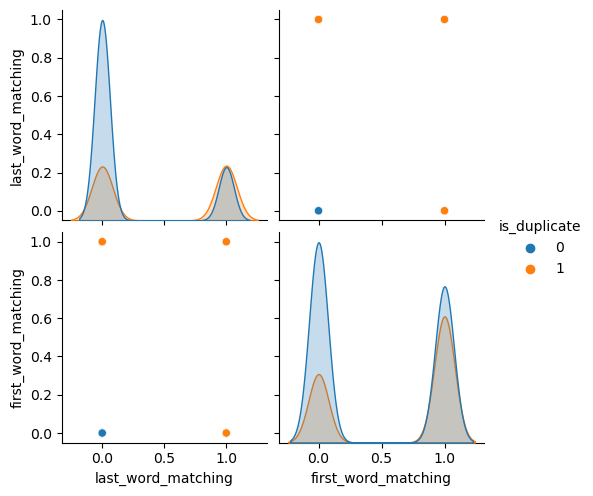

In [114]:
sns.pairplot(new_df[['last_word_matching', 'first_word_matching', 'is_duplicate']],hue='is_duplicate')

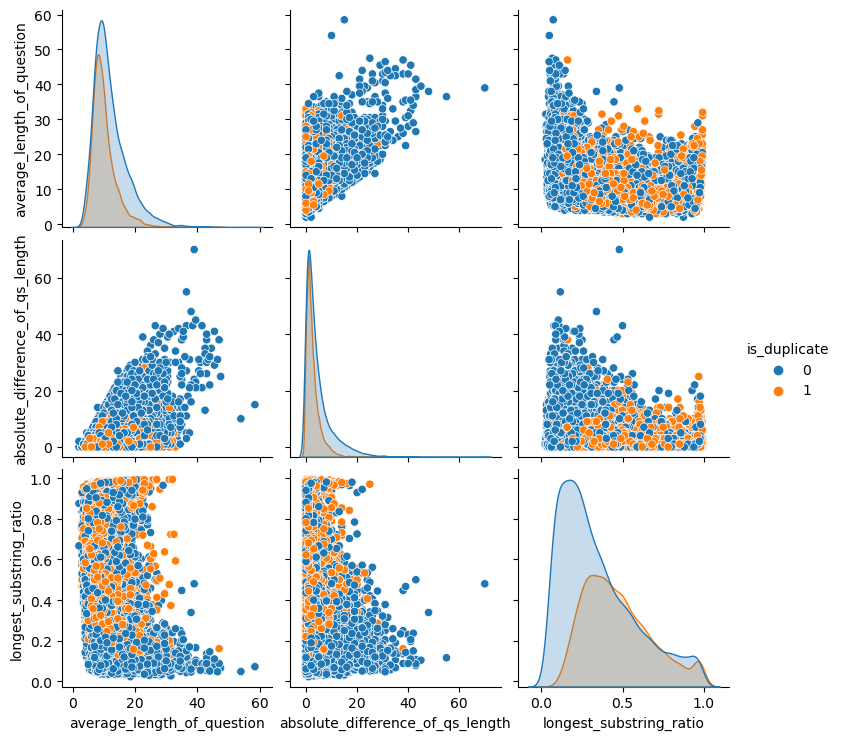

In [115]:
sns.pairplot(new_df[['average_length_of_question', 'absolute_difference_of_qs_length','longest_substring_ratio', 'is_duplicate']],hue='is_duplicate')

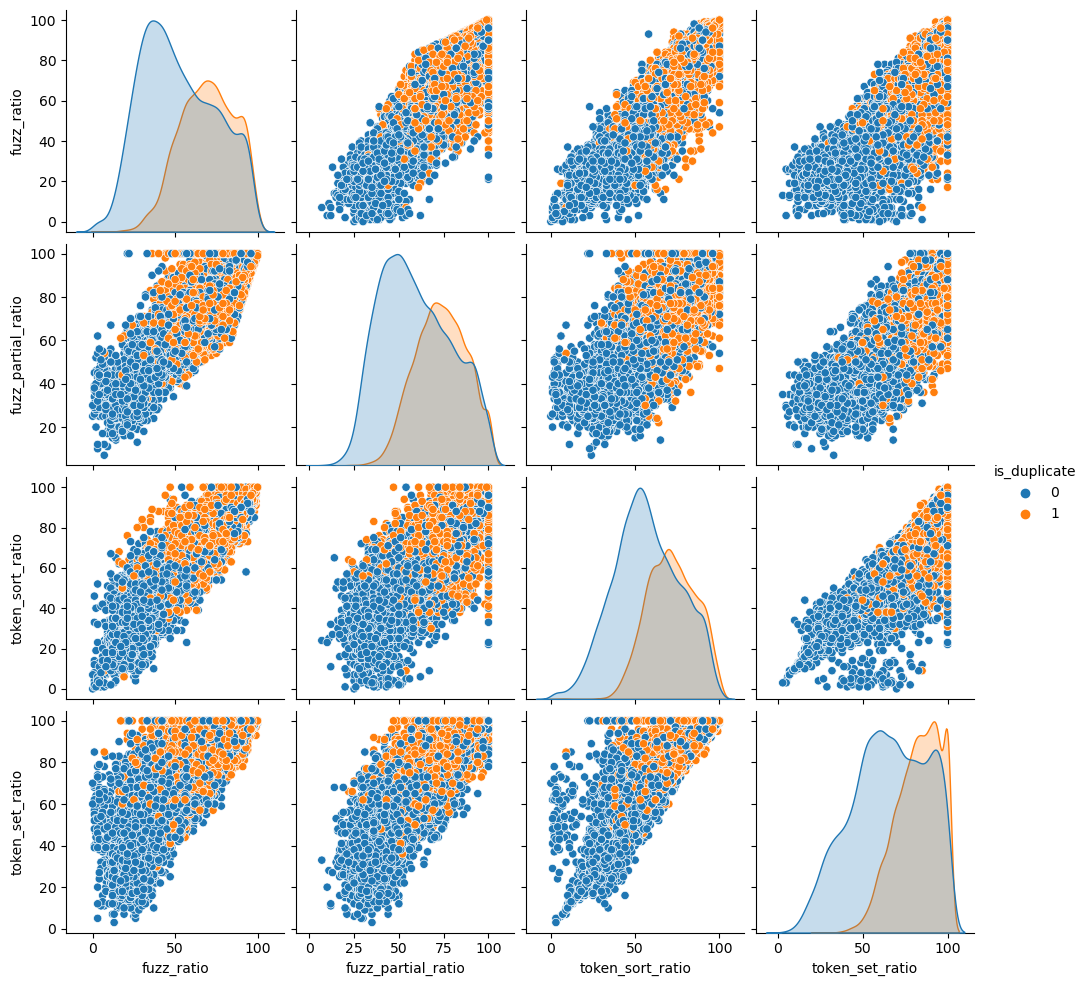

In [116]:
sns.pairplot(new_df[['fuzz_ratio', 'fuzz_partial_ratio','token_sort_ratio','token_set_ratio', 'is_duplicate']],hue='is_duplicate')

In [117]:

from sklearn.preprocessing import MinMaxScaler

X = MinMaxScaler().fit_transform(new_df[['common_stopwords_count_min', 'common_stopwords_count_max' ,'common_words_count_min', 'common_words_count_max', 'common_token_count_min' , 'common_token_count_max' , 'last_word_matching', 'first_word_matching' , 'absolute_difference_of_qs_length' , 'average_length_of_question' , 'token_set_ratio' , 'token_sort_ratio' , 'fuzz_ratio' , 'fuzz_partial_ratio' , 'longest_substring_ratio']])
y = new_df['is_duplicate'].values

In [118]:
# Using TSNE for Dimentionality reduction for 15 Features(Generated after cleaning the data) to 3 dimention

from sklearn.manifold import TSNE

tsne2d = TSNE(
    n_components=2,init='random',random_state=42 ,method='barnes_hut', n_iter=2000,verbose=2,angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 20000 samples in 0.049s...
[t-SNE] Computed neighbors for 20000 samples in 3.785s...
[t-SNE] Computed conditional probabilities for sample 1000 / 20000
[t-SNE] Computed conditional probabilities for sample 2000 / 20000
[t-SNE] Computed conditional probabilities for sample 3000 / 20000
[t-SNE] Computed conditional probabilities for sample 4000 / 20000
[t-SNE] Computed conditional probabilities for sample 5000 / 20000
[t-SNE] Computed conditional probabilities for sample 6000 / 20000
[t-SNE] Computed conditional probabilities for sample 7000 / 20000
[t-SNE] Computed conditional probabilities for sample 8000 / 20000
[t-SNE] Computed conditional probabilities for sample 9000 / 20000
[t-SNE] Computed conditional probabilities for sample 10000 / 20000
[t-SNE] Computed conditional probabilities for sample 11000 / 20000
[t-SNE] Computed conditional probabilities for sample 12000 / 20000
[t-SNE] Computed conditional probabilities for sam

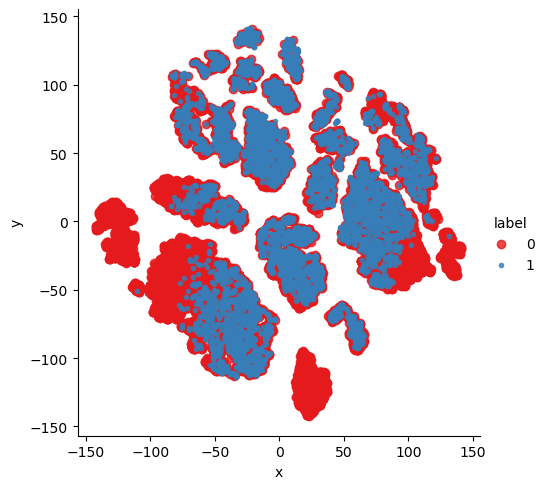

In [119]:
new_df1 = pd.DataFrame({'x':tsne2d[:,0], 'y':tsne2d[:,1] ,'label':y})

# draw the plot in appropriate place in the grid
sns.lmplot(data=new_df1, x='x', y='y', hue='label', fit_reg=False,palette="Set1",markers=['o','.'])


In [120]:
tsne3d = TSNE(
    n_components=3, init='random', random_state=42, method='barnes_hut', n_iter=1000, verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 20000 samples in 0.047s...
[t-SNE] Computed neighbors for 20000 samples in 3.615s...
[t-SNE] Computed conditional probabilities for sample 1000 / 20000
[t-SNE] Computed conditional probabilities for sample 2000 / 20000
[t-SNE] Computed conditional probabilities for sample 3000 / 20000
[t-SNE] Computed conditional probabilities for sample 4000 / 20000
[t-SNE] Computed conditional probabilities for sample 5000 / 20000
[t-SNE] Computed conditional probabilities for sample 6000 / 20000
[t-SNE] Computed conditional probabilities for sample 7000 / 20000
[t-SNE] Computed conditional probabilities for sample 8000 / 20000
[t-SNE] Computed conditional probabilities for sample 9000 / 20000
[t-SNE] Computed conditional probabilities for sample 10000 / 20000
[t-SNE] Computed conditional probabilities for sample 11000 / 20000
[t-SNE] Computed conditional probabilities for sample 12000 / 20000
[t-SNE] Computed conditional probabilities for sam

In [121]:
import plotly.graph_objs as pgo
import plotly.tools as ptls
import plotly.offline as po
po.init_notebook_mode(connected=True)

trace1 = pgo.Scatter3d(x=tsne3d[:,0], y=tsne3d[:,1],z=tsne3d[:,2],mode='markers',marker=dict(sizemode='diameter',
        color = y,colorscale = 'Portland',colorbar = dict(title = 'duplicate'),
        line=dict(color='rgb(255, 255, 255)'),opacity=0.75) )

data=[trace1]
layout=dict(height=1000, width=1000, title='3D embedding with engineered features')
fig=dict(data=data, layout=layout)
po.iplot(fig, filename='3DBubble')

In [122]:
ques_df = new_df[['question1','question2']]


In [123]:
ques_df.shape

(20000, 2)

In [124]:
ques_df.head(5)

question1  \
398782  what is the best marketing automation tool for...   
115086   i am poor but i want to invest  what should i do   
327711  i am from india and live abroad  i met a guy f...   
367788  why do so many people in the u s  hate the sou...   
151235                 consequences of bhopal gas tragedy   

                                                question2  
398782  what is the best marketing automation tool for...  
115086  i am quite poor and i want to be very rich  wh...  
327711  t i e t to thapar university to thapar univers...  
367788  my boyfriend doesnt feel guilty when he hurts ...  
151235  what was the reason behind the bhopal gas tragedy

In [125]:
ques_df.sample(5)

question1  \
45408   how will trump s presidency affect indian stud...   
357369                       what is the meaning of  life   
1020    what are some interesting things to do when bored   
186300            what is the ideal way of loosing weight   
404268  why do not we still do great music like in the...   

                                                question2  
45408   does trump s victory effect indian students fo...  
357369                   what is the meaning of this life  
1020                 what should i do if i am badly bored  
186300                           how should i lose weight  
404268        should i raise my young child on 80 s music

In [126]:
ques_df.tail(5)

question1  \
36225   can i find out who is sending my public snap s...   
333984                 what do you mean by business world   
289725  how we can use waste plastics bags and bottles...   
342679  are hackathons a good place to find technical ...   
245585     is it safe to visit srinagar in september 2016   

                                                question2  
36225   is apple still an innovative  strong competito...  
333984                             what is business world  
289725  how we can use waste plastic bags and bottles ...  
342679  i have no background in programming but have a...  
245585  is it safe to visit srinagar in this coming se...

In [127]:
final_data = new_df.drop(columns=['id','qid1','qid2','question1','question2'])

In [128]:
final_data.shape

(20000, 23)

In [129]:
final_data.head(5)

is_duplicate  chars_in_q1  chars_in_q2  words_no_words_in_q1  \
398782             1           75           76                    13   
115086             0           48           56                    13   
327711             0          104          119                    28   
367788             0           58          145                    14   
151235             0           34           49                     5   

        words_no_words_in_q2  common_words_qs  total_words_in_questions  \
398782                    13               12                        26   
115086                    16                8                        24   
327711                    21                4                        38   
367788                    32                1                        34   
151235                     9                3                        13   

        shared_words_in_questions  common_words_count_min  \
398782                       0.46                0.875000   
115086                       0.33                0.666667   
327711                       0.11                0.000000   
367788                       0.03                0.000000   
151235                       0.23                0.750000   

        common_words_count_max  ...  common_token_count_max  \
398782                   0.875  ...                0.923077   
115086                   0.500  ...                0.466667   
327711                   0.000  ...                0.115385   
367788                   0.000  ...                0.000000   
151235                   0.600  ...                0.333333   

        last_word_matching  first_word_matching  average_length_of_question  \
398782                   1                    1                        13.0   
115086                   1                    1                        13.5   
327711                   0                    0                        23.0   
367788                   0                    0                        21.5   
151235                   1                    0                         7.0   

        absolute_difference_of_qs_length  longest_substring_ratio  \
398782                                 0                 0.855263   
115086                                 3                 0.224490   
327711                                 6                 0.047619   
367788                                17                 0.050847   
151235                                 4                 0.542857   

        fuzz_partial_ratio  fuzz_ratio  token_sort_ratio  token_set_ratio  
398782                  99          99                99               99  
115086                  67          69                65               74  
327711                  29          26                34               43  
367788                  41          29                23               30  
151235                  70          55                48               69  

[5 rows x 23 columns]

In [130]:
final_data.sample(5)

is_duplicate  chars_in_q1  chars_in_q2  words_no_words_in_q1  \
1527               0           40           39                     9   
338705             1           69           49                    12   
301318             0           39           32                    10   
331852             0           21           48                     5   
289874             0           39           88                     8   

        words_no_words_in_q2  common_words_qs  total_words_in_questions  \
1527                      10                6                        19   
338705                     9                5                        21   
301318                     8                4                        18   
331852                    11                5                        14   
289874                    15                2                        21   

        shared_words_in_questions  common_words_count_min  \
1527                         0.32                1.000000   
338705                       0.24                0.666667   
301318                       0.22                1.000000   
331852                       0.36                1.000000   
289874                       0.10                0.333333   

        common_words_count_max  ...  common_token_count_max  \
1527                  0.750000  ...                0.600000   
338705                0.666667  ...                0.416667   
301318                0.600000  ...                0.400000   
331852                0.750000  ...                0.454545   
289874                0.200000  ...                0.133333   

        last_word_matching  first_word_matching  average_length_of_question  \
1527                     1                    0                         9.5   
338705                   0                    1                        10.5   
301318                   1                    0                         9.0   
331852                   1                    0                         8.0   
289874                   0                    0                        11.5   

        absolute_difference_of_qs_length  longest_substring_ratio  \
1527                                   1                 0.625000   
338705                                 3                 0.200000   
301318                                 2                 0.363636   
331852                                 6                 0.772727   
289874                                 7                 0.375000   

        fuzz_partial_ratio  fuzz_ratio  token_sort_ratio  token_set_ratio  
1527                    76          71                66               76  
338705                  54          58                63               79  
301318                  68          62                56               64  
331852                  86          61                61              100  
289874                  56          38                52               58  

[5 rows x 23 columns]

In [131]:
final_data.tail(5)

is_duplicate  chars_in_q1  chars_in_q2  words_no_words_in_q1  \
36225              0          137          112                    28   
333984             1           34           22                     7   
289725             1           62           65                    11   
342679             0          143          140                    23   
245585             1           46           53                     9   

        words_no_words_in_q2  common_words_qs  total_words_in_questions  \
36225                     20                3                        42   
333984                     4                3                        11   
289725                    12               10                        23   
342679                    28                6                        46   
245585                    10                8                        19   

        shared_words_in_questions  common_words_count_min  \
36225                        0.07                0.000000   
333984                       0.27                1.000000   
289725                       0.43                0.833333   
342679                       0.13                0.166667   
245585                       0.42                0.800000   

        common_words_count_max  ...  common_token_count_max  \
36225                 0.000000  ...                0.074074   
333984                0.666667  ...                0.428571   
289725                0.833333  ...                0.833333   
342679                0.133333  ...                0.185185   
245585                0.800000  ...                0.800000   

        last_word_matching  first_word_matching  average_length_of_question  \
36225                    0                    0                        23.0   
333984                   1                    1                         5.5   
289725                   1                    1                        11.5   
342679                   0                    0                        24.0   
245585                   0                    1                         9.5   

        absolute_difference_of_qs_length  longest_substring_ratio  \
36225                                  8                 0.035398   
333984                                 3                 0.652174   
289725                                 1                 0.444444   
342679                                 6                 0.085106   
245585                                 1                 0.680851   

        fuzz_partial_ratio  fuzz_ratio  token_sort_ratio  token_set_ratio  
36225                   33          30                36               38  
333984                  77          71                71               93  
289725                  94          96                96               96  
342679                  21          21                41               36  
245585                  74          83                85               94  

[5 rows x 23 columns]

In [132]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_array, q2_array = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [133]:
temp_df1 = pd.DataFrame(q1_array, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_array, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)

In [134]:
temp_df.shape

(20000, 6000)

In [135]:
temp_data.sample(5)

0  1  2  3  4  5  6  7  8  9  ...  2991  2992  2993  2994  2995  2996  \
52075   0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
392155  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
324837  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
401781  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
308581  0  0  0  0  0  0  0  0  0  0  ...     1     0     0     0     0     0   

        2997  2998  2999  is_duplicate  
52075      0     0     0             0  
392155     0     0     0             1  
324837     0     0     0             0  
401781     0     0     0             1  
308581     0     0     0             0  

[5 rows x 6001 columns]

In [136]:
final_data = pd.concat([final_data, temp_df], axis=1)

In [137]:
final_data.shape

(20000, 6023)

In [138]:
final_data.sample(5)

is_duplicate  chars_in_q1  chars_in_q2  words_no_words_in_q1  \
258506             1           38           40                     6   
320189             0           65           79                    12   
250705             1           55           33                    10   
239731             0          130          133                    20   
138779             0           83           53                    11   

        words_no_words_in_q2  common_words_qs  total_words_in_questions  \
258506                     7                3                        13   
320189                    15                8                        27   
250705                     7                6                        17   
239731                    21                5                        39   
138779                     7                5                        18   

        shared_words_in_questions  common_words_count_min  \
258506                       0.23                0.666667   
320189                       0.30                0.800000   
250705                       0.35                0.666667   
239731                       0.13                0.300000   
138779                       0.28                1.000000   

        common_words_count_max  ...  2990  2991  2992  2993  2994  2995  2996  \
258506                0.500000  ...     0     0     0     0     0     0     0   
320189                0.444444  ...     0     0     0     0     0     0     0   
250705                0.500000  ...     0     0     0     0     0     0     0   
239731                0.230769  ...     0     0     0     0     0     0     0   
138779                0.600000  ...     0     0     0     0     0     0     0   

        2997  2998  2999  
258506     0     0     0  
320189     0     0     0  
250705     0     0     0  
239731     0     0     0  
138779     0     0     0  

[5 rows x 6023 columns]

In [139]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(final_data.iloc[:,1:].values,final_data.iloc[:,0].values,test_size=0.2,random_state=1)
a = final_data.iloc[:,1:]

In [140]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7865


In [141]:
"""from sklearn import svm

svm_classifier = svm.SVC(kernel='linear')

# Train the model
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
"""

'from sklearn import svm\n\nsvm_classifier = svm.SVC(kernel=\'linear\')\n\n# Train the model\nsvm_classifier.fit(X_train, y_train)\n\n# Make predictions on the test set\ny_pred = svm_classifier.predict(X_test)\n\n# Evaluate the accuracy of the model\naccuracy = accuracy_score(y_test, y_pred)\nprint("Accuracy:", accuracy)\n'

In [142]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.789


In [143]:
from sklearn.tree import DecisionTreeClassifier

# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the testing data to model
y_pred = clf.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred) * 100
print("Accuracy:", accuracy)

Accuracy: 72.95


In [144]:
from sklearn.neural_network import MLPClassifier

# Create an MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)

# Train the classifier
mlp.fit(X_train, y_train)

# Make predictions on the test set
y_pred = mlp.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy = accuracy  * 100
print("Accuracy:", accuracy )


Accuracy: 71.45


In [145]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier object
knn = KNeighborsClassifier(n_neighbors=3)

# Train the KNN classifier
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.697


In [146]:
from sklearn.metrics import confusion_matrix

In [147]:
# for random forest model
confusion_matrix(y_test,y_pred)

array([[1960,  568],
       [ 644,  828]])

In [149]:
# for xgboost model
confusion_matrix(y_test,y_pred)

array([[1960,  568],
       [ 644,  828]])

In [150]:
def test_common_words_in_question(ques1,ques2):
    word1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    word2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))   
    length = len(word1 & word2)
    return length

In [168]:
def test_total_words(ques1,ques2):
    word1 = set(map(lambda word: word.lower().strip(), ques1.split(" ")))
    word2 = set(map(lambda word: word.lower().strip(), ques2.split(" ")))    
    length = (len(word1) + len(word2))
    return length

In [178]:
# Advanced Feature adding
from nltk.corpus import stopwords

def test_token_features_fetching_from_questions(question1,question2):

    
    SAFE_DIV = 0.0000001 

    STOP_WORDS = stopwords.words("english")
    
    token_features = [0.0]*8 # bcz of 8 features 0-7
    
    # Converting the Sentence into Tokens: 
    question1_tokens = question1.split()
    question2_tokens = question2.split()
    
    if len(question1_tokens) == 0 or len(question2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    question1_words = set([word for word in question1_tokens if word not in STOP_WORDS])
    question2_words = set([word for word in question2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    question1_stops = set([word for word in question1_tokens if word in STOP_WORDS])
    question2_stops = set([word for word in question2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(question1_words.intersection(question2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(question1_stops.intersection(question2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(question1_tokens).intersection(set(question2_tokens)))
    
    token_features[0] = common_word_count / (min(len(question1_words), len(question2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(question1_words), len(question2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(question1_stops), len(question2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(question1_stops), len(question2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(question1_tokens), len(question2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(question1_tokens), len(question2_tokens)) + SAFE_DIV)
    
    # Last word of Q1 AND Q2 is SAME or NOT
    token_features[6] = int(question1_tokens[-1] == question2_tokens[-1])
    
    # First word of Q1 AND Q2 is AME or NOT
    token_features[7] = int(question1_tokens[0] == question2_tokens[0])
    
    return token_features


In [179]:
import distance

def test_fetch_length_features(question1,question2):
    
    length_features = [0.0]*3
    
    # Converting the Sentence into Tokens: 
    question1_tokens = question1.split()
    question2_tokens = question2.split()
    
    if len(question1_tokens) == 0 or len(question2_tokens) == 0:
        return length_features
    
    
    #Average Token Length of both Questions
    length_features[0] = (len(question1_tokens) + len(question2_tokens))/2
    
    # Absolute length features
    length_features[1] = abs(len(question1_tokens) - len(question2_tokens))
    
    strs = list(distance.lcsubstrings(question1, question2))
    length_features[2] = len(strs[0]) / (min(len(question1), len(question2)) + 1)
    
    return length_features
    

In [180]:
# Fuzzy Features
from fuzzywuzzy import fuzz

def test_fetch_fuzzy_features_from_questions(question1, question2):
    
    fuzzy_features = [0.0]*4
    

    # fuzz_partial_ratio btw question 1 and Question 2
    fuzzy_features[0] = fuzz.partial_ratio(question1, question2)

    # fuzz_ratio btw question 1 and Question 2
    fuzzy_features[1] = fuzz.QRatio(question1, question2)
    
    # token_sort_ratio btw question 1 and Question 2
    fuzzy_features[2] = fuzz.token_sort_ratio(question1, question2)

    # token_set_ratio btw question 1 and Question 2
    fuzzy_features[3] = fuzz.token_set_ratio(question1, question2)

    return fuzzy_features

In [181]:
def query_point_creator(question1,question2):
    
    input_query = []
    
    # preprocess
    question1 = questions_preprocessing(q1)
    question2 = questions_preprocessing(q2)
    
    # fetch basic features
    input_query.append(len(question1))
    input_query.append(len(question2))
    
    input_query.append(len(question1.split(" ")))
    input_query.append(len(question2.split(" ")))
    
    input_query.append(test_common_words_in_question(question1,question2))
    input_query.append(test_total_words(question1,question2))
    input_query.append(round(test_common_words_in_question(question1,question2)/test_total_words(question1,question2),2))
    
    # fetch token features
    token_features = test_token_features_fetching_from_questions(question1,question2)
    input_query.extend(token_features)
    
    # fetch length based features
    length_features = test_fetch_length_features(question1,question2)
    input_query.extend(length_features)
    
    # fetch fuzzy features
    fuzzy_features = test_fetch_fuzzy_features_from_questions(question1,question2)
    input_query.extend(fuzzy_features)
    
    # bag of words feature for q1
    question1_bow = cv.transform([question1]).toarray()
    
    # bag oo words feature for q2
    question2_bow = cv.transform([question2]).toarray()
    
    
    
    return np.hstack((np.array(input_query).reshape(1,22),question1_bow,question2_bow))